In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data-Set

In [13]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Use the full path to your file inside Google Drive
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Dataset/diabetes.csv')
diabetes_dataset.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


In [14]:
print(diabetes_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None


# Diabities data set described

In [15]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [16]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,1316
1,684


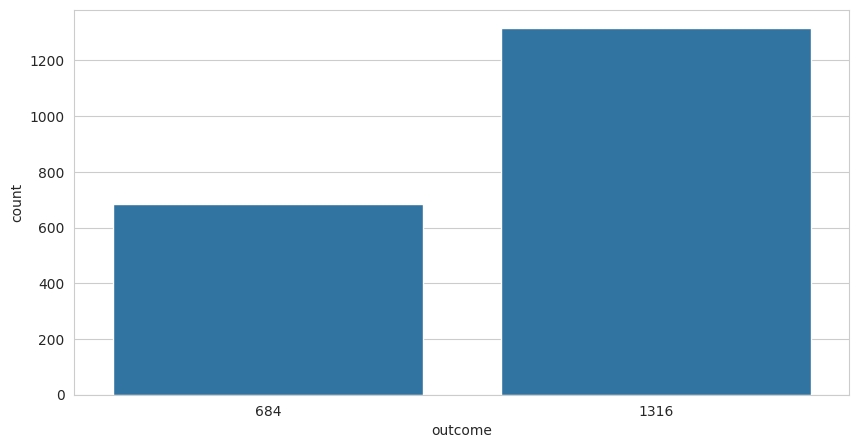

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.xlabel("outcome")
sns.barplot(x=diabetes_dataset['Outcome'].value_counts(),y=diabetes_dataset['Outcome'].value_counts())
plt.show()

# 0----->zero indicate Diabetic,     1-----one indicate Diabetic

In [18]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


# Separation of Data and Labels

In [19]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [20]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [21]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


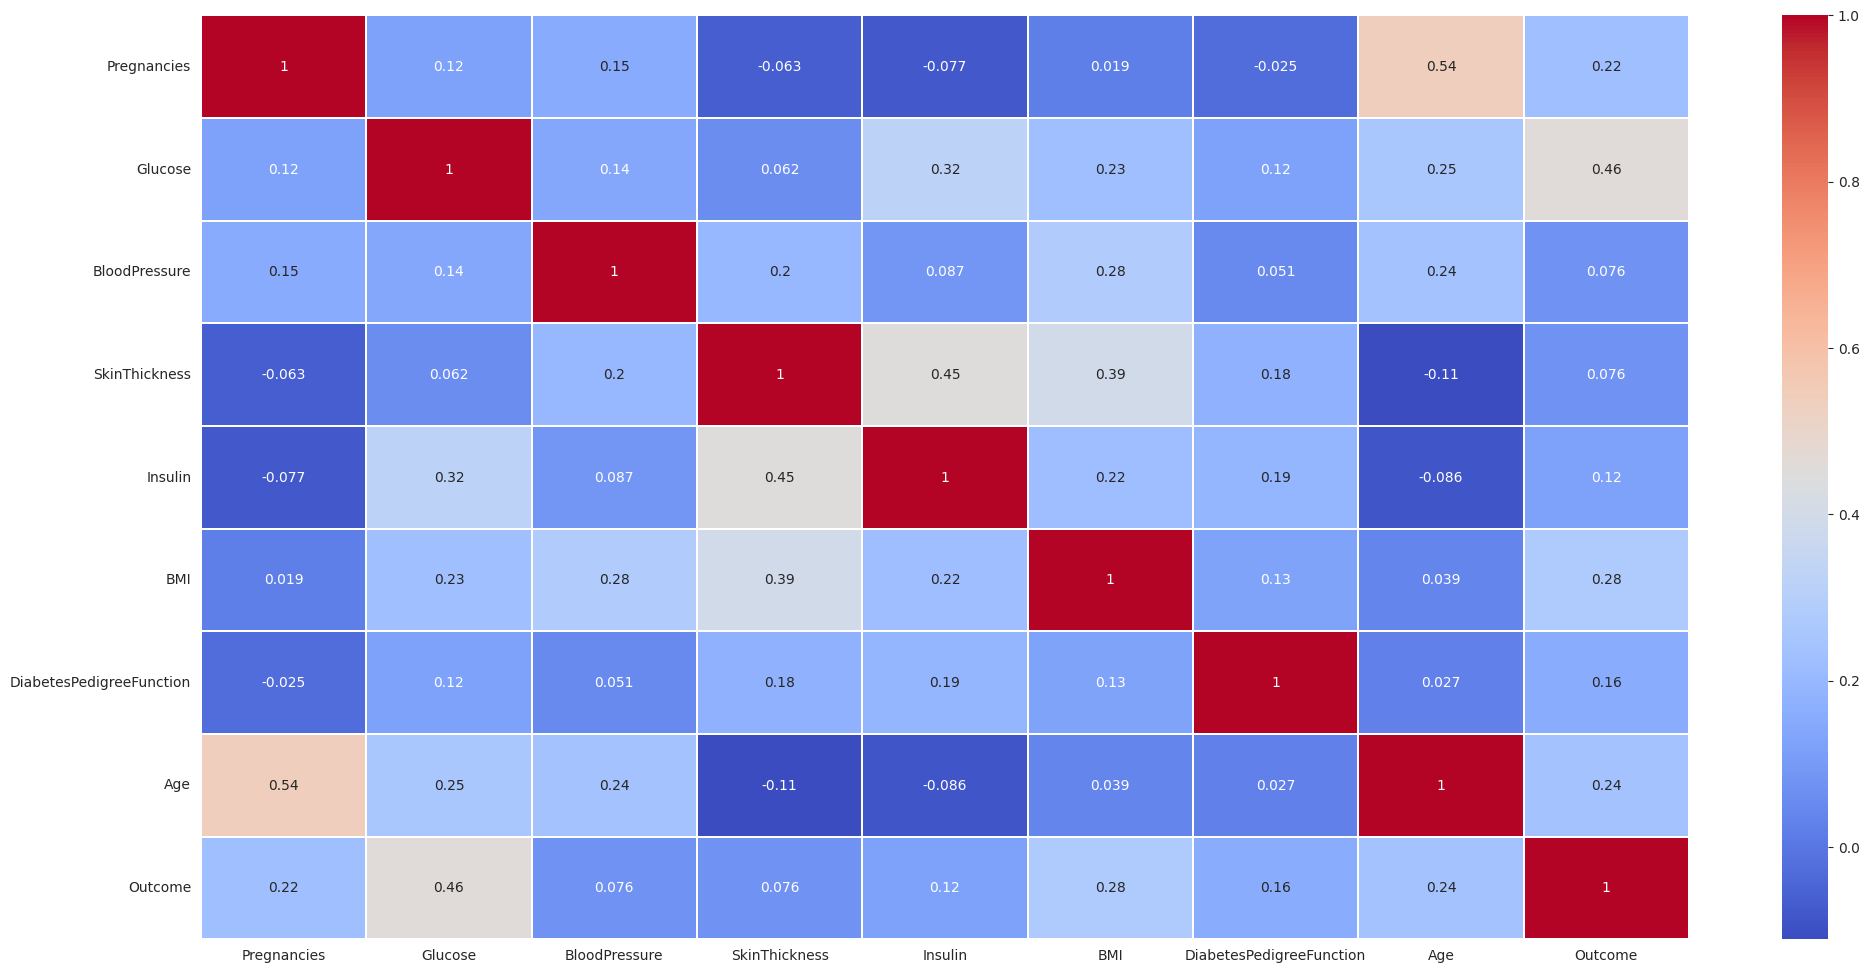

In [22]:
plt.figure(figsize=(24,12))
sns.heatmap(diabetes_dataset.corr(),cmap='coolwarm', annot = True, linewidths=.1)
plt.show()

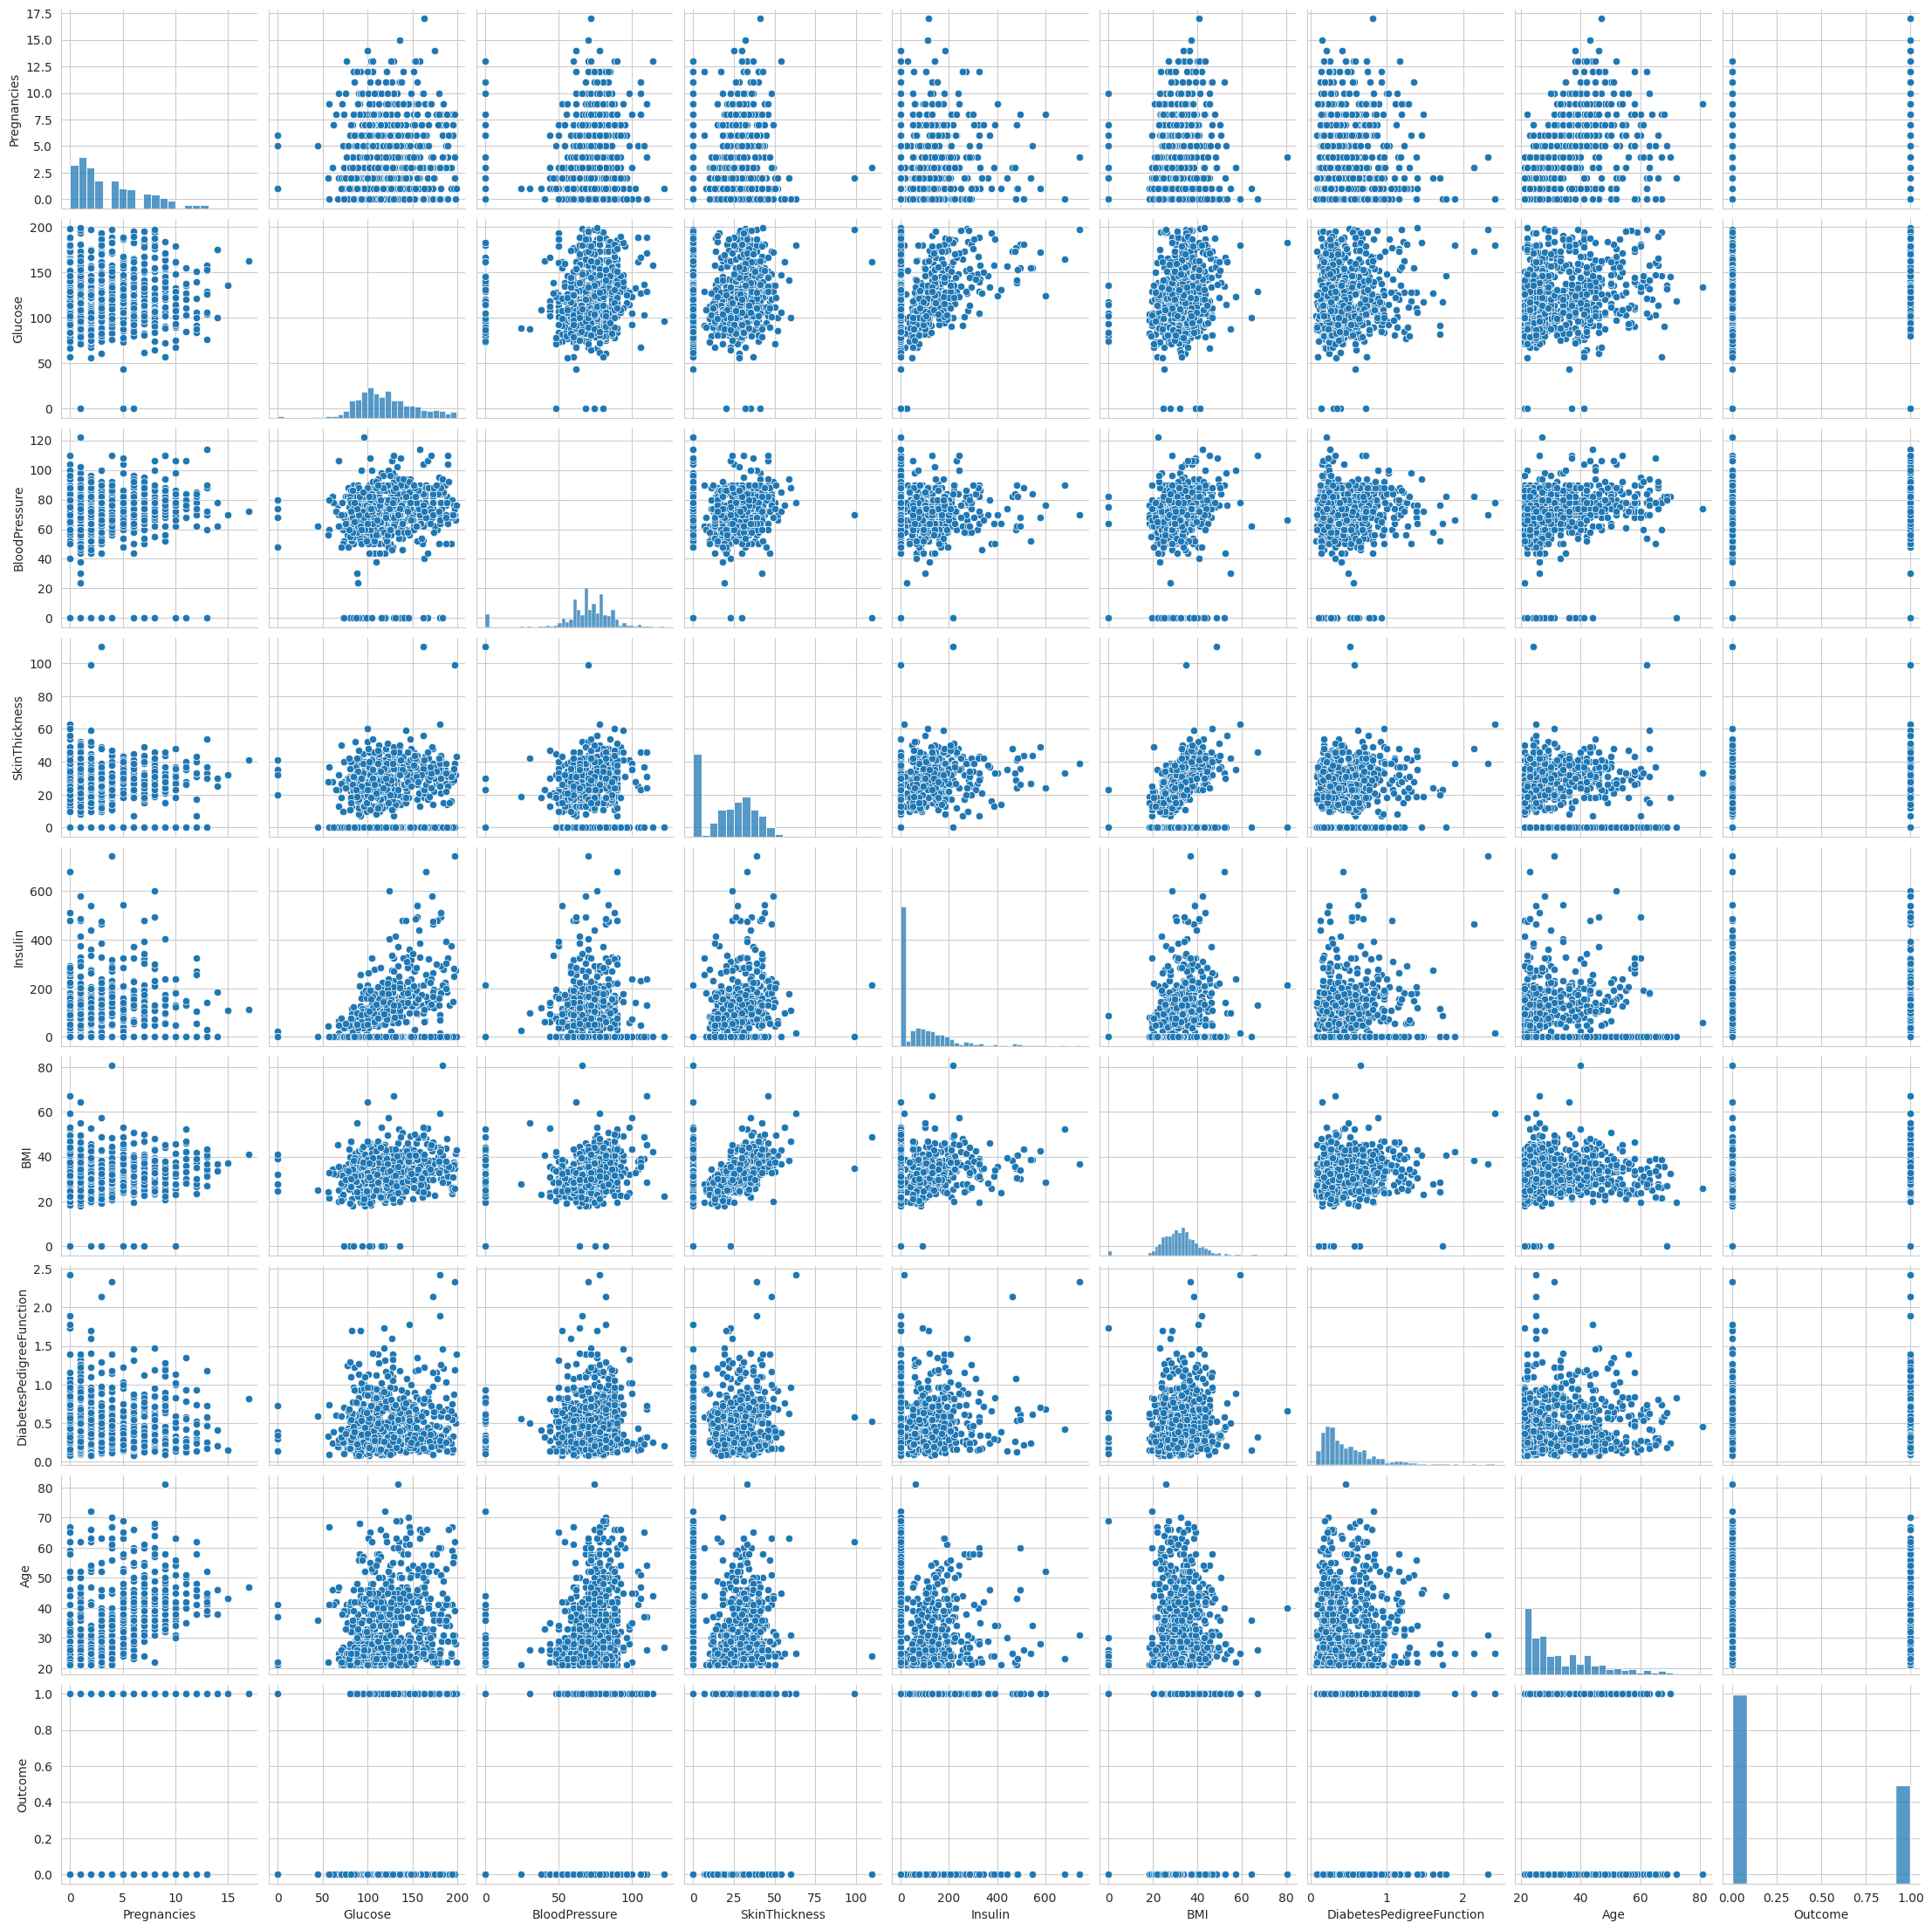

In [23]:
sns.pairplot(diabetes_dataset)
plt.show()

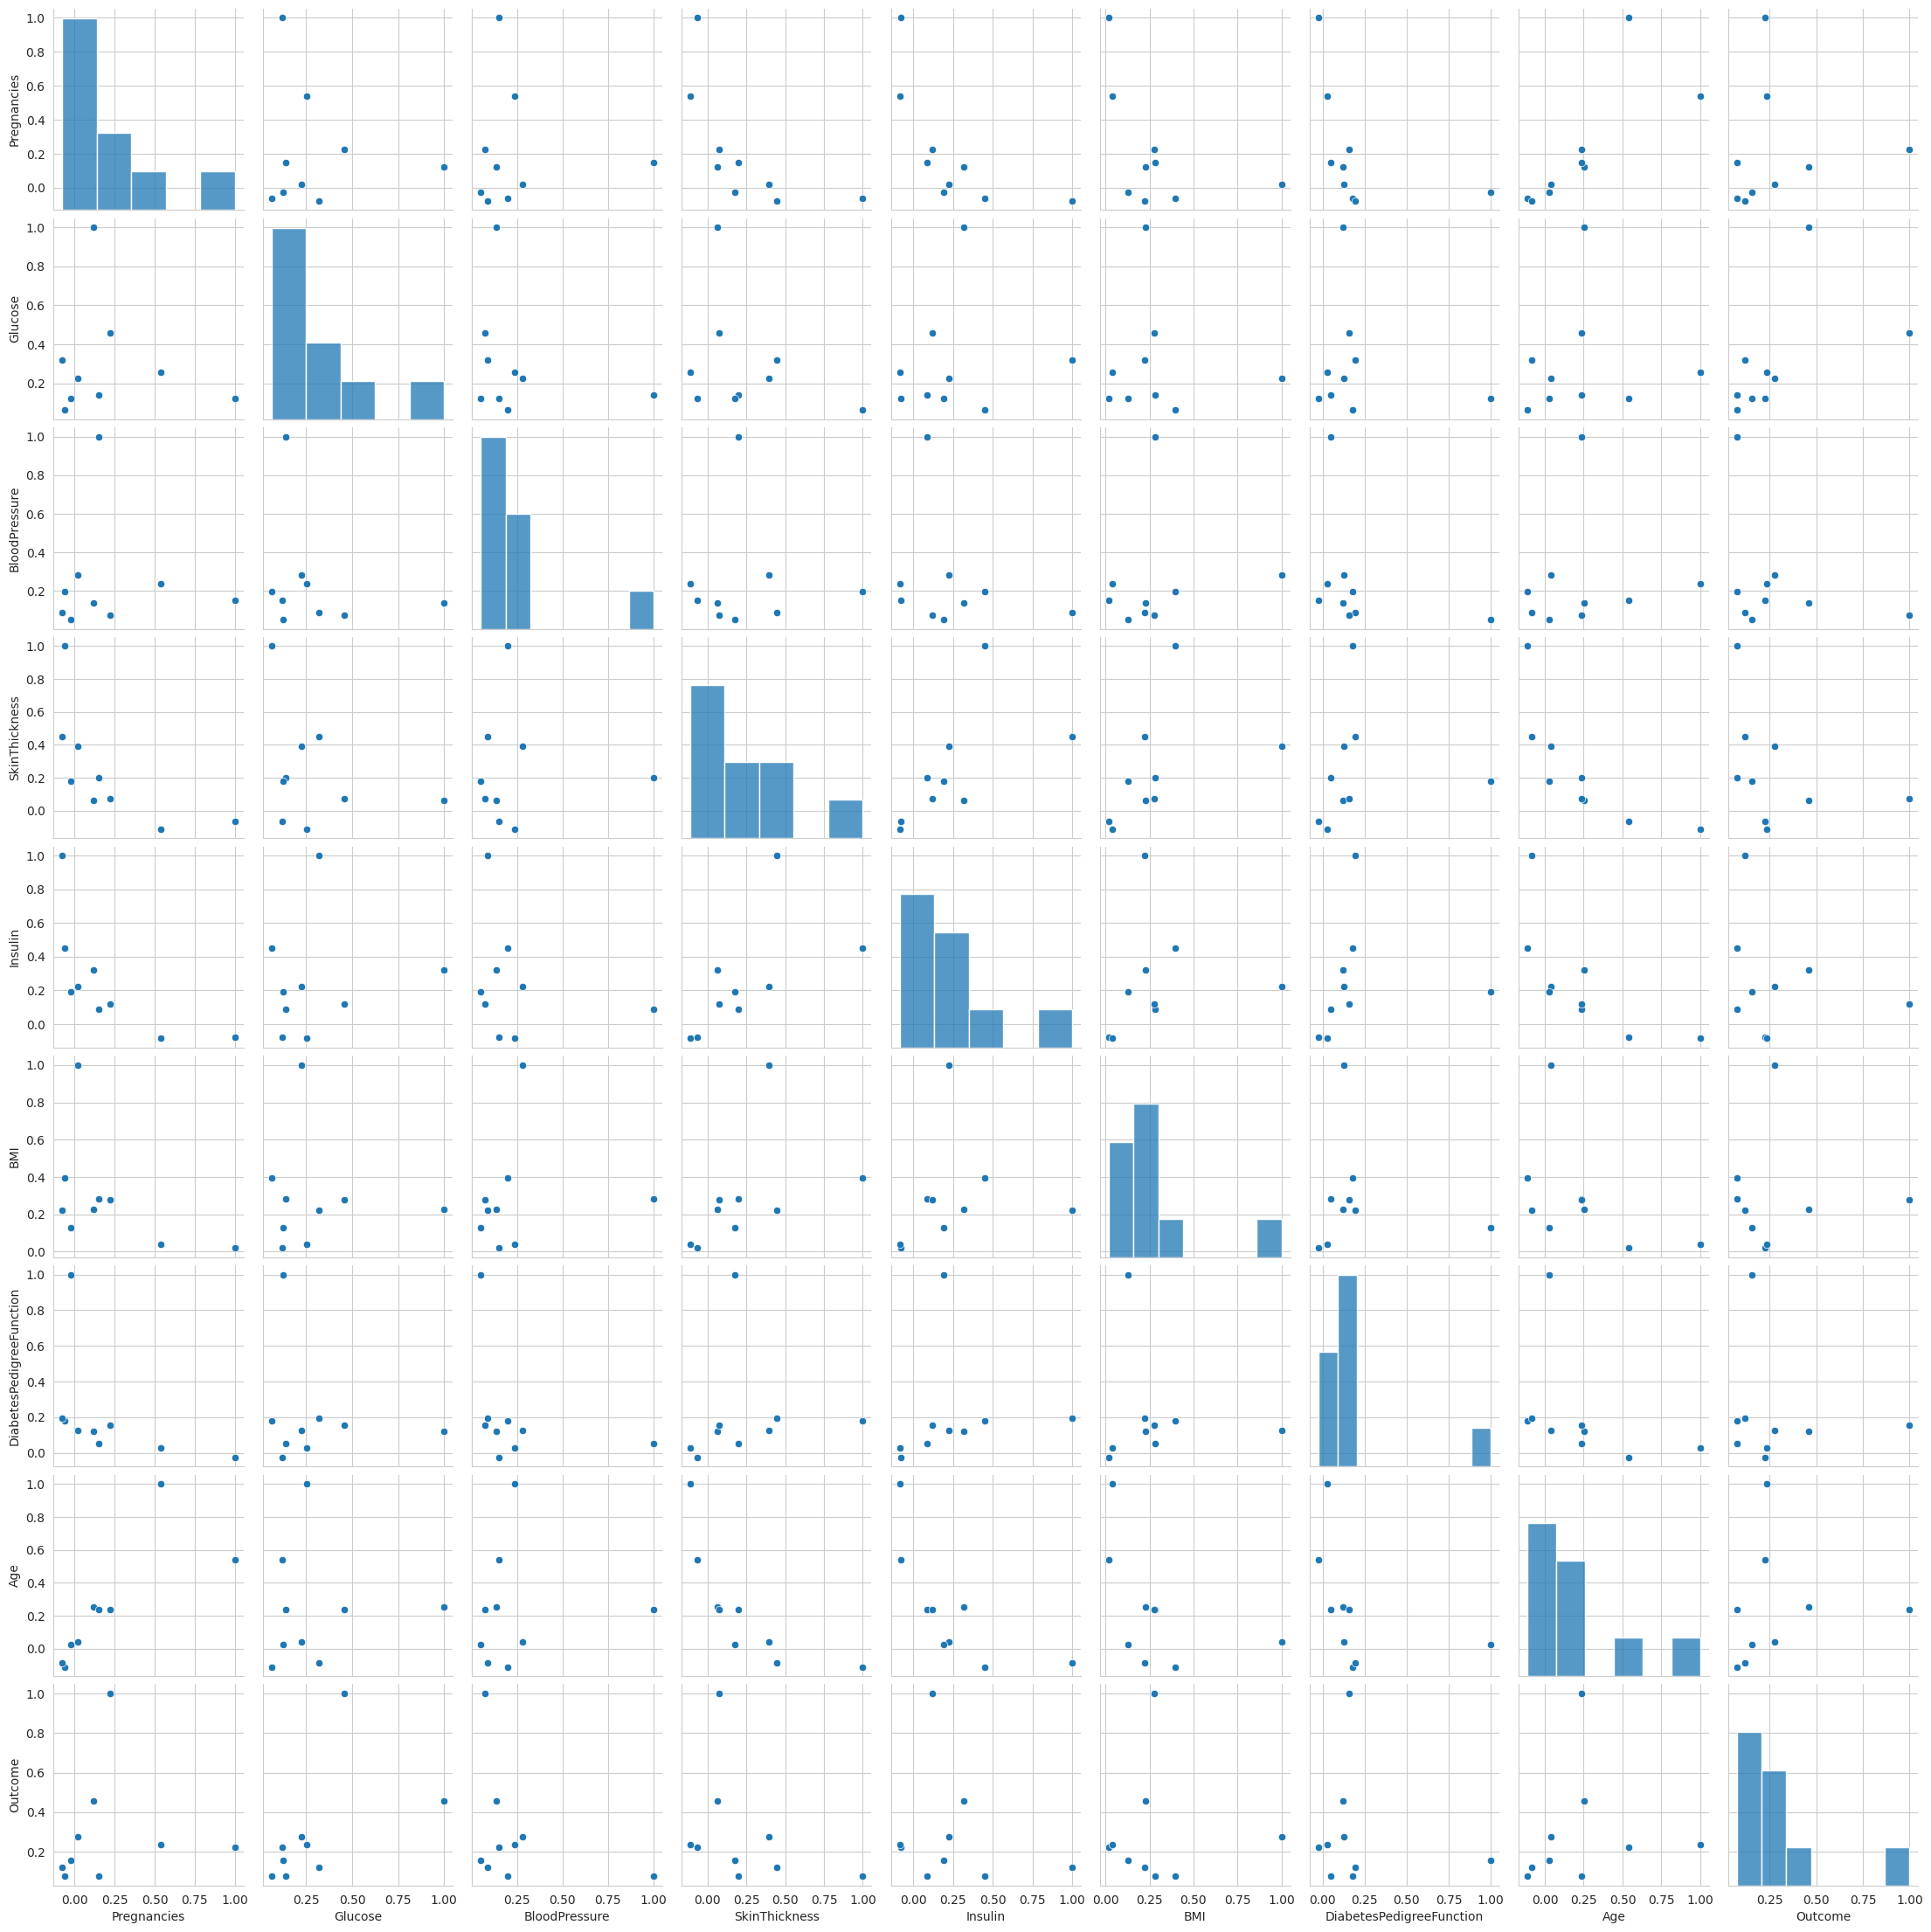

In [24]:
sns.pairplot(diabetes_dataset.corr())
plt.show()

# Data Standarization

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(X)

StandardScaler()

In [27]:
standardized_data = scaler.transform(X)

In [28]:
print(standardized_data)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]


In [29]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [30]:
print(X)
print(Y)

[[-0.5153943   0.52455322 -0.37248123 ...  0.17268332 -1.06324616
   1.18042417]
 [-1.12049474 -1.1597562   0.67008046 ...  0.73724853 -0.7355513
  -0.85632626]
 [-1.12049474  0.74288962 -3.60442246 ...  1.47363794  0.49175869
  -0.17740945]
 ...
 [ 0.69480658 -1.12856529  0.46156812 ... -0.12187245 -0.27492362
   0.75610116]
 [-1.12049474  0.24383498  2.12966682 ...  4.28419085 -0.46968566
  -0.60173245]
 [-0.5153943  -1.25332895  0.14879962 ... -0.25687717  0.23516743
  -0.68659705]]
0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64


# Train and Test split Data for further Analysis

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape,Y_test.shape)

(2000, 8) (1600, 8) (400, 8) (400,)


# Training the Model for fitness using SVM

In [35]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [36]:
print(Y_train)

406     1
1777    1
1789    1
774     0
1291    0
       ..
1550    0
1765    0
1051    0
990     0
160     0
Name: Outcome, Length: 1600, dtype: int64


In [37]:
from collections import Counter
Counter(Y_train)

Counter({1: 547, 0: 1053})

In [38]:
Y_train.shape

(1600,)

# Accuracy score on the traning data SVM Model

In [39]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print(X_train_prediction)

[0 1 0 ... 0 0 0]


In [41]:
from collections import Counter
Counter(X_train_prediction)

Counter({np.int64(0): 1173, np.int64(1): 427})

In [42]:
X_train_prediction.shape

(1600,)

In [43]:
print('Accuracy of training data: ', training_data_accuracy)

Accuracy of training data:  0.775


# Accuracy score on the test data SVM Model


In [44]:
accuracies =  {}
# Support Vector Classifier
from sklearn import svm
svm_model = svm.SVC(C=1,kernel='poly',gamma='auto')
svm_model.fit(X_train, Y_train)
svm_prediction = svm_model.predict(X_test)
svm_accuracy = svm_model.score(X_test,Y_test)
accuracies['SVC'] = svm_accuracy
print("Testing Accuracty of SVC Model : ",svm_accuracy)

Testing Accuracty of SVC Model :  0.81


In [45]:
print(classification_report(Y_test,svm_prediction))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       263
           1       0.87      0.53      0.65       137

    accuracy                           0.81       400
   macro avg       0.83      0.74      0.76       400
weighted avg       0.82      0.81      0.80       400



# Accuracy score on the test data Decision Tree Model

In [46]:
#accuracies =  {}
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)
dtc_prediction = dtc_model.predict(X_test)
dtc_accuracy = dtc_model.score(X_test,Y_test)
accuracies['DecisionTreeClassifier'] = dtc_accuracy
print("Testing Accuracty of DecisionTreeClassifier Model : ",dtc_accuracy)

Testing Accuracty of DecisionTreeClassifier Model :  0.98


In [47]:
print(classification_report(Y_test,dtc_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       263
           1       0.96      0.99      0.97       137

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



# Accuracy score on the Training data DecisionTree Model

In [48]:
#accuracies =  {}
# Decision Tree Classifier for Training data
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, Y_train)
dtc_prediction1 = dtc_model.predict(X_train)
dtc_accuracy = dtc_model.score(X_test,Y_test)
accuracies['DecisionTreeClassifier'] = dtc_accuracy
print("Training Accuracty of DecisionTreeClassifier Model : ",dtc_accuracy)

Training Accuracty of DecisionTreeClassifier Model :  0.98


# Random forest model testing accuracy result

In [49]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model.fit(X_train, Y_train)
rf_prediction = rf_model.predict(X_test)
rf_accuracy = rf_model.score(X_test,Y_test)
accuracies['RandomForestClassifier'] = rf_accuracy
print("Testing Accuracty of RandomForestClassifier Model : ",rf_accuracy)

Testing Accuracty of RandomForestClassifier Model :  0.9725


In [50]:
print(classification_report(Y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       263
           1       0.96      0.96      0.96       137

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



# Random forest model training accuracy

In [51]:
# Random Forest Classification for traning
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model.fit(X_train, Y_train)
rf_prediction1 = rf_model.predict(X_train)
rf_accuracy = rf_model.score(X_test,Y_test)
accuracies['RandomForestClassifier'] = rf_accuracy
print("Training Accuracty of RandomForestClassifier Model : ",rf_accuracy)

Training Accuracty of RandomForestClassifier Model :  0.9725


# LogisticRegression model testing accuracy result

In [52]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_prediction = lr_model.predict(X_test)
lr_accuracy = lr_model.score(X_test,Y_test)
accuracies['LogisticRegression'] = lr_accuracy
print("Testing Accuracty of logic regressiion Model : ",lr_accuracy)

Testing Accuracty of logic regressiion Model :  0.785


In [53]:
print(classification_report(Y_test,lr_prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       263
           1       0.76      0.55      0.64       137

    accuracy                           0.79       400
   macro avg       0.78      0.73      0.74       400
weighted avg       0.78      0.79      0.77       400



 # LogisticRegression model training accuracy result

In [54]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_prediction1 = lr_model.predict(X_train)
lr_accuracy = lr_model.score(X_test,Y_test)
accuracies['LogisticRegression'] = lr_accuracy
print("Training Accuracty of logic regression Model : ",lr_accuracy)

Training Accuracty of logic regression Model :  0.785


# K-Neighbors Classifier training data Accuracy result

In [55]:
from sklearn.neighbors import KNeighborsClassifier
lr_model = KNeighborsClassifier(n_neighbors=10)
lr_model.fit(X_train, Y_train)
knn_prediction1 = lr_model.predict(X_train)
lr_accuracy = lr_model.score(X_test,Y_test)
accuracies['KNeighborsClassifier'] = lr_accuracy
print("Training Accuracty of KNeighborsClassifier : ",lr_accuracy)

Training Accuracty of KNeighborsClassifier :  0.8075


In [56]:
print(classification_report(Y_test,dtc_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       263
           1       0.96      0.99      0.97       137

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [57]:
from sklearn.neighbors import KNeighborsClassifier

lr_model = KNeighborsClassifier(n_neighbors=10)
lr_model.fit(X_train, Y_train)
knn_prediction = lr_model.predict(X_test)
lr_accuracy = lr_model.score(X_test,Y_test)
accuracies['KNeighborsClassifier'] = lr_accuracy
print("Testing Accuracty of KNeighborsClassifier : ",lr_accuracy)

Testing Accuracty of KNeighborsClassifier :  0.8075


In [58]:
print(classification_report(Y_test,knn_prediction))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       263
           1       0.76      0.64      0.70       137

    accuracy                           0.81       400
   macro avg       0.79      0.77      0.78       400
weighted avg       0.80      0.81      0.80       400



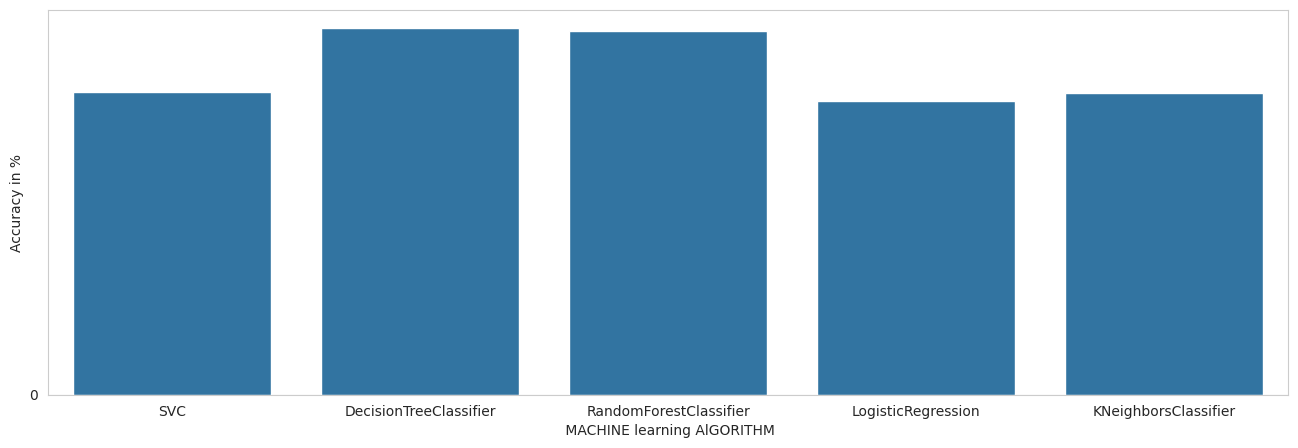

In [59]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in %")
plt.xlabel(" MACHINE learning AlGORITHM")
sns.barplot(y=list(accuracies.values()),x=list(accuracies.keys()))
plt.show()

# Result shows the correct predictions by using confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(Y_test,svm_prediction)
cm_dtc = confusion_matrix(Y_test,dtc_prediction)
cm_rf  = confusion_matrix(Y_test,rf_prediction)
cm_lr  = confusion_matrix(Y_test,lr_prediction)
cm_knn  = confusion_matrix(Y_test,knn_prediction)

<Axes: title={'center': 'KNN  Machine Confusion Matrix'}>

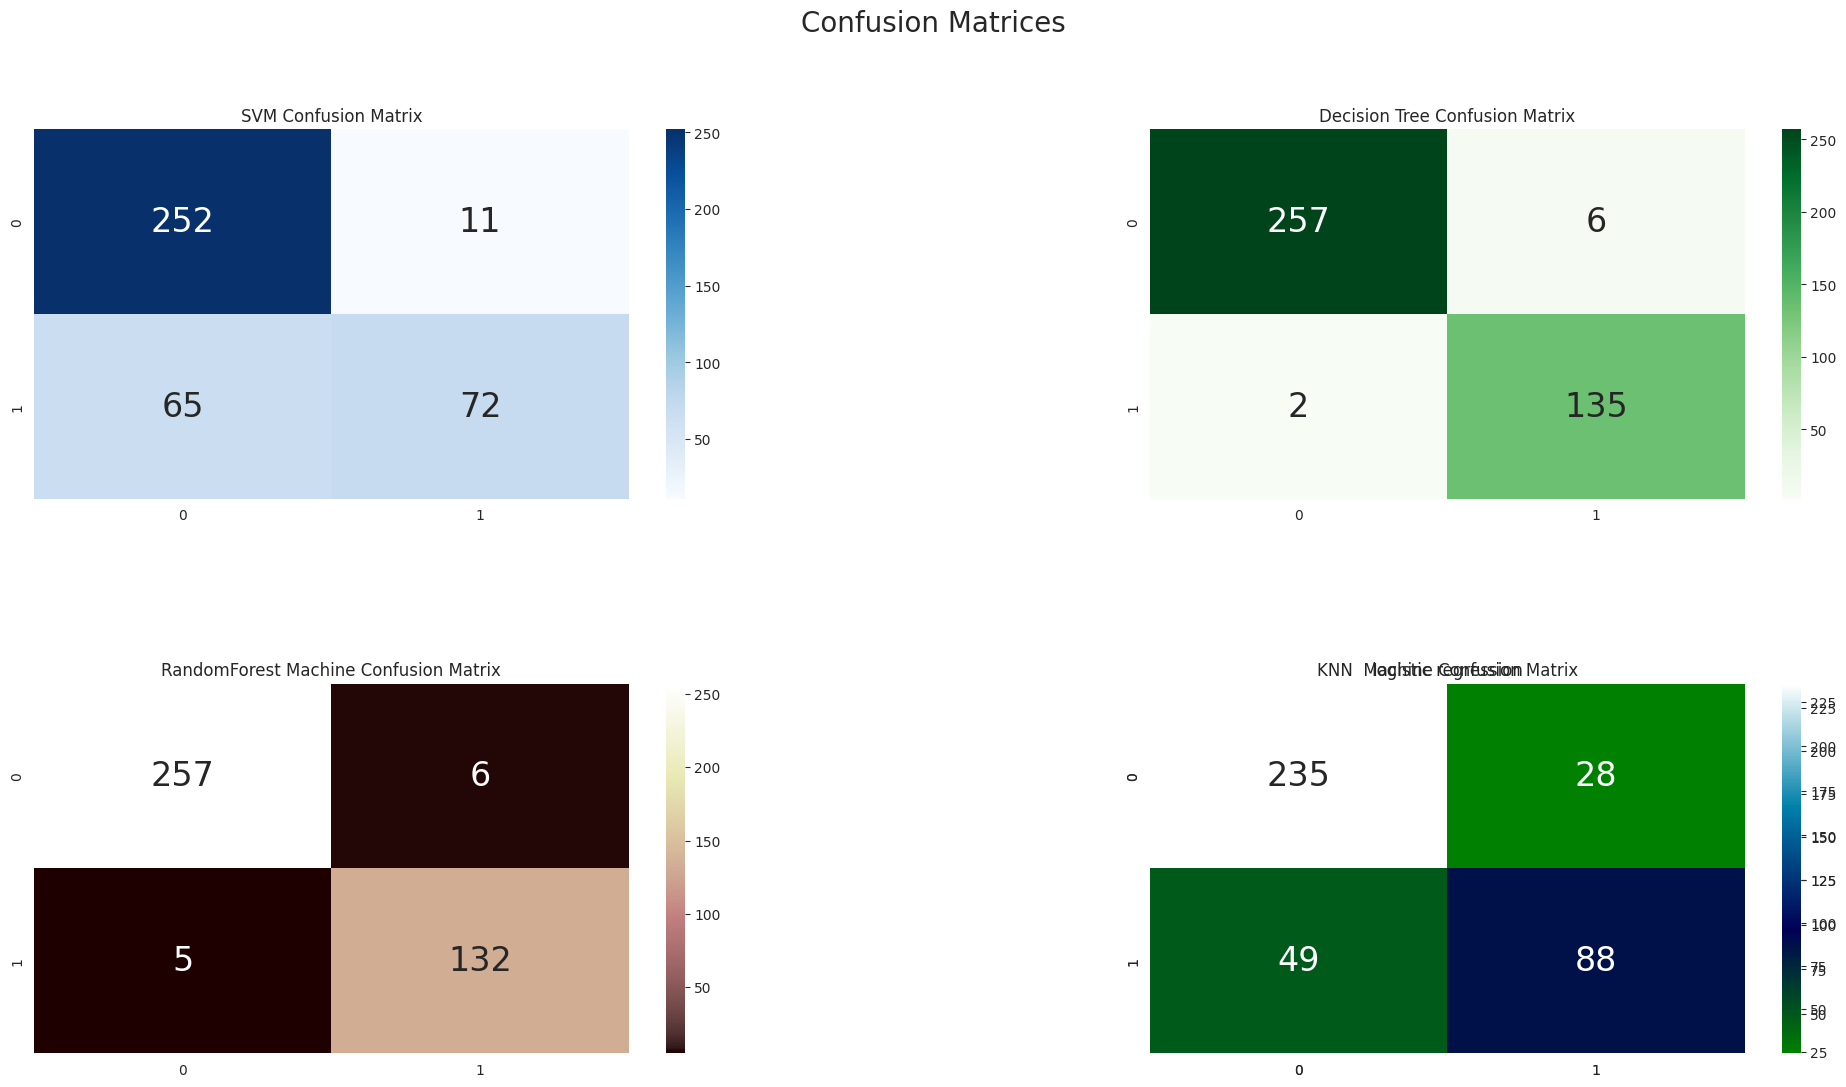

In [61]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=20)
plt.subplots_adjust(wspace = 0.5, hspace= 0.5)

plt.subplot(2,2,1)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,cmap="Blues",cbar=True,fmt="d", annot=True,annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm_dtc,cmap="Greens",cbar=True,annot=True,fmt="d", annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("RandomForest Machine Confusion Matrix")
sns.heatmap(cm_rf,cmap="pink",cbar=True,annot=True,fmt="d", annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("logistic regression")
sns.heatmap(cm_lr,cmap="Purples",cbar=True,annot=True,fmt="d" ,annot_kws={"size": 24})


plt.subplot(2,2,4)
plt.title("KNN  Machine Confusion Matrix")
sns.heatmap(cm_knn,cmap="ocean",cbar=True,annot=True,fmt="d", annot_kws={"size": 24})


# Making a Predictiion weather patient is Diabetic or not

In [62]:
input_data = (137,40,35,168,43.1,2.288,33,1)
input_data_as_numpy_array = np.asarray(input_data)
#print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = scaler.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)
if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[ 40.32888524  -2.53215647  -1.77993951   9.13491654  -0.33426078
   -3.67028755 100.56234898  -2.72334748]]
[1]
The person is diabetic
